# Homework 01 - Valentina Blasone
## Deep Learning - A.A. 2020/2021

In [ ]:
import torch

> 1. _Taking inspiration from the notebook `01-intro-to-pt.ipynb`, build a class for the Multilayer Perceptron (MLP) whose scheme is drawn in the last figure of the notebook. As written there, no layer should have bias units and the activation for each hidden layer should be the Rectified Linear Unit (ReLU) function, also called ramp function. The activation leading to the output layer, instead, should be the softmax function, which prof. Ansuini explained during the last lecture. You can find some notions on it also on the notebook._

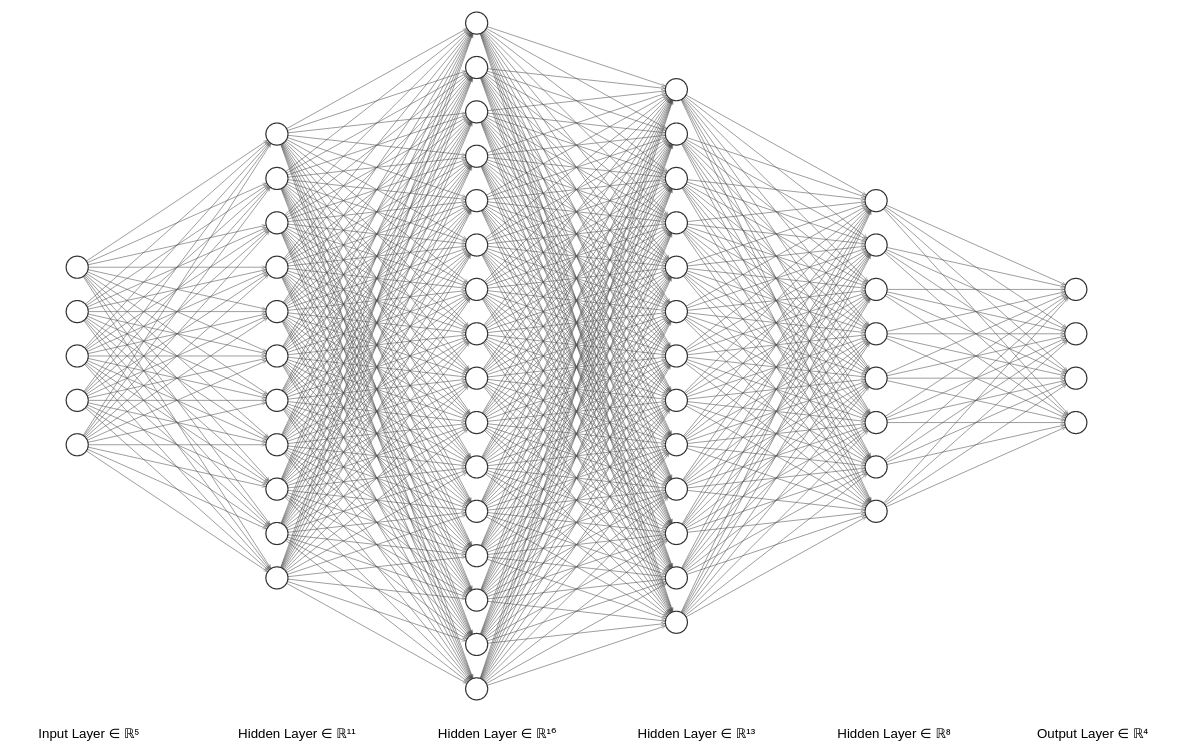

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(in_features=5, out_features=11, bias=False)
        self.layer2 = torch.nn.Linear(in_features=11, out_features=16, bias=False)
        self.layer3 = torch.nn.Linear(in_features=16, out_features=13, bias=False)
        self.layer4 = torch.nn.Linear(in_features=13, out_features=8, bias=False)
        self.layer5 = torch.nn.Linear(in_features=8, out_features=4, bias=False)

    def forward(self, X):
        out = self.layer1(X)
        out = torch.nn.functional.relu(out)
        out = self.layer2(out)
        out = torch.nn.functional.relu(out)
        out = self.layer3(out)
        out = torch.nn.functional.relu(out)
        out = self.layer4(out)
        out = torch.nn.functional.relu(out)
        out = self.layer5(out)
        out = torch.nn.functional.softmax(out)
        return out

> _2. After having defined the class, create an instance of it and print a summary using a method of your choice._


The structure of the MLP model can be quickly investigated by just printing the model.

In [ ]:
model = MLP()
model

MLP(
  (layer1): Linear(in_features=5, out_features=11, bias=False)
  (layer2): Linear(in_features=11, out_features=16, bias=False)
  (layer3): Linear(in_features=16, out_features=13, bias=False)
  (layer4): Linear(in_features=13, out_features=8, bias=False)
  (layer5): Linear(in_features=8, out_features=4, bias=False)
)

We can retrieve additional information  by using the `torch-summary` package.

In [ ]:
import sys
!{sys.executable} -m pip install torch-summary #how to use pip or conda in jupyter notebooks
from torchsummary import summary

In [ ]:
summary(model)

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            55
├─Linear: 1-2                            176
├─Linear: 1-3                            208
├─Linear: 1-4                            104
├─Linear: 1-5                            32
Total params: 575
Trainable params: 575
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            55
├─Linear: 1-2                            176
├─Linear: 1-3                            208
├─Linear: 1-4                            104
├─Linear: 1-5                            32
Total params: 575
Trainable params: 575
Non-trainable params: 0

> 3. Provide detailed calculations (layer-by-layer) on the exact number of parameters in the network.

**Layer 1.** We have 5 values in input for each of the 11 neurons and therefore 5 weight-parameters for each of the 11 neurons:

$$\text{Param L1}= 5\cdot 11 = 55$$ \\

**Layer 2.** We have 11 values in input for each of the 16 neurons and therefore 11 weight-parameters for each of the 16 neurons:

$$\text{Param L2}= 11\cdot 16 = 176$$ \\

**Layer 3.** We have 16 values in input for each of the 13 neurons and therefore 16 weight-parameters for each of the 13 neurons:

$$\text{Param L3}= 16\cdot 13 = 208$$ \\

**Layer 4.** We have 13 values in input for each of the 8 neurons and therefore 13 weight-parameters for each of the 8 neurons:

$$\text{Param L4}= 13\cdot 8 = 104$$ \\

**Layer 5.** We have 8 values in input for each of the 4 neurons and therefore 8 weight-parameters for each of the 4 neurons:

$$\text{Param L5}= 8\cdot 4 = 32$$ \\

The total number of parameters in the network is therefore:

$$\text{Param Tot}= 55+176+208+104+32=575$$

> 3.1. Provide the same calculation in the case that the bias units are present in all layers (except input).

**Layer 1.** For each neuron we have to consider an additional parameter for the bias, therefore:

$$\text{Param L1}= 5\cdot 11 + 1 \cdot 11 = 66$$ \\

**Layer 2.** For each neuron we have to consider an additional parameter for the bias, therefore:

$$\text{Param L2}= 11\cdot 16 + 1 \cdot 16 = 192$$ \\

**Layer 3.** For each neuron we have to consider an additional parameter for the bias, therefore:

$$\text{Param L3}= 16\cdot 13 + 1 \cdot 13 = 221$$ \\

**Layer 4.** For each neuron we have to consider an additional parameter for the bias, therefore:

$$\text{Param L4}= 13\cdot 8 + 1 \cdot 8 = 112$$ \\

**Layer 5.** In this case the number of parameters remains unchanged (no bias):

$$\text{Param L5}= 8\cdot 4 = 32$$ \\

The total number of parameters in the network is therefore:

$$\text{Param Tot}= 66+192+221+112+32=623$$ \\





> 4. For each layer within the MLP, calculate the L2 norm and L1 norm of its parameters.

In [ ]:
for param_name, param in model.state_dict().items():
    print(param_name)
    print("L1 norm:", torch.norm(param,p=1).item())
    print("L2 norm:", torch.norm(param,p=2).item(),"\n")

layer1.weight
L1 norm: 11.970909118652344
L2 norm: 1.8728350400924683 

layer2.weight
L1 norm: 29.421770095825195
L2 norm: 2.503084421157837 

layer3.weight
L1 norm: 26.104555130004883
L2 norm: 2.1079413890838623 

layer4.weight
L1 norm: 13.758572578430176
L2 norm: 1.5895962715148926 

layer5.weight
L1 norm: 5.6942291259765625
L2 norm: 1.1365227699279785 

